<a href="https://colab.research.google.com/github/luishenriquesimoes/data-science-bootcamp/blob/main/TrabalhoFinal_DataScience_Luis_Simoes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho Final - Ciência de Dados - Enap / 2021
### Aluno: Luís Henrique Simões

### Apresentação do Dataset

Este trabalho utiliza 8 diferentes datasets:
4 datasets de índices econômicos "tradicionais":
  - valor do índice IPCA, de 1995 até hoje;
  - cotação do dólar, de 1995 até hoje;
  - cotação do ouro, de 1995 até hoje;
  - valor do índice IBOVESPA, de 1995 até hoje;

4 datasets de índices econômicos elaborados por instituições particulares referentes a investimentos específicos:
  - valor do índice FIPEZap, de 2008 até hoje (proxy do investimento em imóveis)- disponível no site da FIPE;
  - valor dos índices ANBIMA de títulos públicos: IMA-S (títulos atrelados à Selic), IMA-B 5 (títulos atrelados ao IPCA com vencimento em até 5 anos) e IMA-B 5+ (títulos atrelados ao IPCA com vencimento em mais de 5 anos) - disponível no site do Banco Central


#### Link para Download do Dataset

In [130]:
path_dolar = 'https://raw.githubusercontent.com/luishenriquesimoes/data-science-bootcamp/main/bases_dados/usd_brl_dados_historicos.csv'
path_ouro = 'https://raw.githubusercontent.com/luishenriquesimoes/data-science-bootcamp/main/bases_dados/ouro_futuros_dados_historicos.csv'
path_ibovespa = 'https://raw.githubusercontent.com/luishenriquesimoes/data-science-bootcamp/main/bases_dados/ibovespa_dados_historicos.csv'
path_ipca = 'https://github.com/luishenriquesimoes/data-science-bootcamp/raw/main/bases_dados/ipca_202101SerieHist.xls'

path_fipezap = 'https://github.com/luishenriquesimoes/data-science-bootcamp/raw/main/bases_dados/fipezap-serieshistoricas.xls'
path_anbima = 'https://raw.githubusercontent.com/luishenriquesimoes/data-science-bootcamp/main/bases_dados/series_ambima.csv'


### Motivação Pessoal

Gosto de estudar sobre investimentos em geral. Neste caso específico, minha intenção é comparar a evolução de um índice de inflação (IPCA) e buscar, dentre as alternativas mais óbvias de investimentos (dólar, ouro, bolsa brasileira, taxa Selic, imóveis e títulos do tesouro indexados à inflação) qual é o investimento que apresenta maior correlação com a inflação, a fim de estabelecer a alternativa mais adequada para uma proteção contra inflação no curto/médio prazo.
*Nota sobre os títulos públicos:* não está sendo considerado o cenário em que os títulos são levados até o final do prazo, pois esses prazos normalmente são longos demais para uma proteção a curto/médio prazo. Ao invés disso, estão sendo utilizados os preços de venda no mercado secundário, de acordo com a métrica utilizada pela ANBIMA para elaboração dos índices IMA-S, IMA-B 5 e IMA-B 5+.
*Nota sobre a escolha dos prazos:* para as bases de dados com disponibilidade virtualmente ilimitada (ouro, câmbio, bolsa), foi escolhido o ano de 1995 devido ao início do Plano Real. Para as bases que passaram a ser divulgadas/calculadas após essa data, foi escolhida a data de início de divulgação.

### Investigação

####1) Importação das bibliotecas

In [87]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from time import strptime
from time import strftime
from time import mktime
import datetime

####2) Construção das funções que serão utilizadas em vários momentos

In [3]:
#função para converter strings de data em português em elementos de data
mapeamento = {
    'Jan': 'Jan',
    'Fev': 'Feb',
    'Mar': 'Mar',
    'Abr': 'Apr',
    'Mai': 'May',
    'Jun': 'Jun',
    'Jul': 'Jul',
    'Ago': 'Aug',
    'Set': 'Sep',
    'Out': 'Oct',
    'Nov': 'Nov',
    'Dez': 'Dec'
}

def separa_mes_ano_portugues(df, coluna_data, sep):
  df[['mes', 'ano']] = pd.DataFrame(df[coluna_data].str.split(sep, 1).to_list(), columns=['mes', 'ano'])
  df['mes'].replace(mapeamento, inplace=True)
  df['date'] = df.apply(lambda x: datetime.datetime(year=strptime(x['ano'], '%y').tm_year, month=strptime(x['mes'],'%b').tm_mon, day=1), axis=1)

####3) Conversão das bases de dados em DataFrames

#####Montagem do DataFrame Dólar

In [4]:
df_dolar = pd.read_csv(path_dolar, sep=',', decimal=',', thousands='.')
separa_mes_ano_portugues(df_dolar, 'Data', ' ')
df_dolar.sort_values('date', inplace=True)
df_dolar
df_dolar_reduced = df_dolar.loc[df_dolar['date'] >= datetime.datetime(1995, 1, 1), ['date', 'Último']]
df_dolar_reduced.columns = ['date', 'dolar']
df_dolar_reduced.index = df_dolar_reduced['date']
del df_dolar_reduced['date']
df_dolar_reduced

,dolar
date,
1995-01-01,0.8405
1995-02-01,0.8505
1995-03-01,0.9000
1995-04-01,0.9175
1995-05-01,0.9055
...,...
2020-11-01,5.3319
2020-12-01,5.1937
2021-01-01,5.4625


#####Montagem do DataFrame Ouro

In [5]:
df_ouro = pd.read_csv(path_ouro, sep=',', decimal=',', thousands='.')
separa_mes_ano_portugues(df_ouro, 'Data', ' ')
df_ouro.sort_values('date', inplace=True)
df_ouro_reduced = df_ouro.loc[df_ouro['date'] >= datetime.datetime(1995, 1, 1), ['date', 'Último']]
df_ouro_reduced.columns = ['date', 'ouro']
df_ouro_reduced.index = df_ouro_reduced['date']
del df_ouro_reduced['date']
df_ouro_reduced

,ouro
date,
1995-01-01,375.4
1995-02-01,376.9
1995-03-01,392.2
1995-04-01,387.0
1995-05-01,385.1
...,...
2020-11-01,1784.8
2020-12-01,1899.6
2021-01-01,1850.3


#####Montagem do DataFrame Ibovespa

In [6]:
df_ibovespa = pd.read_csv(path_ibovespa, sep=',', decimal=',', thousands='.')
separa_mes_ano_portugues(df_ibovespa, 'Data', ' ')
df_ibovespa.sort_values('date', inplace=True)
df_ibovespa_reduced = df_ibovespa.loc[df_ibovespa['date'] >= datetime.datetime(1995, 1, 1), ['date', 'Último']]
df_ibovespa_reduced.columns = ['date', 'ibovespa']
df_ibovespa_reduced.index = df_ibovespa_reduced['date']
del df_ibovespa_reduced['date']
df_ibovespa_reduced

,ibovespa
date,
1995-01-01,3885.00
1995-02-01,3270.90
1995-03-01,2979.00
1995-04-01,3813.70
1995-05-01,3720.60
...,...
2020-11-01,108893.30
2020-12-01,119017.20
2021-01-01,115067.60


#####Montagem do DataFrame IPCA

In [7]:
df_ipca = pd.read_excel(path_ipca, usecols="A:C", skiprows=7)
df_ipca.columns=['ano', 'mes', 'ipca']
df_ipca = df_ipca[~df_ipca['ipca'].isna()]
df_ipca = df_ipca[~df_ipca['mes'].isna()]
df_ipca = df_ipca[df_ipca['ano'] != 'ANO']
df_ipca['ipca'] = df_ipca['ipca'].astype('float')
df_ipca['ano'].fillna(method='ffill', inplace=True)
df_ipca['mes'] = df_ipca['mes'].apply(lambda x: str(x).capitalize()).replace(mapeamento)
df_ipca['date'] = df_ipca.apply(lambda x: datetime.datetime(year=strptime(str(x['ano']), '%Y').tm_year, month=strptime(x['mes'],'%b').tm_mon, day=1), axis=1)
df_ipca_reduced = df_ipca.loc[df_ipca['date'] >= datetime.datetime(1995, 1, 1), ['date', 'ipca']]
df_ipca_reduced.index = df_ipca_reduced['date']
del df_ipca_reduced['date']
df_ipca_reduced

,ipca
date,
1995-01-01,1033.74
1995-02-01,1044.28
1995-03-01,1060.47
1995-04-01,1086.24
1995-05-01,1115.24
...,...
2020-09-01,5391.75
2020-10-01,5438.12
2020-11-01,5486.52


#####Montagem do DataFrame FipeZap

In [8]:
df_fipezap = pd.read_excel(path_fipezap, skiprows=3, skipfooter=5, usecols='B,C')
df_fipezap.columns = ['date', 'fipezap']
df_fipezap['date'] = df_fipezap['date']
df_fipezap.index = df_fipezap['date']
del df_fipezap['date']
df_fipezap

,fipezap
date,
2008-01-01,41.811068
2008-02-01,42.065077
2008-03-01,42.506114
2008-04-01,43.090377
2008-05-01,43.666822
...,...
2020-09-01,132.123105
2020-10-01,132.674674
2020-11-01,133.265317


#####Montagem do DataFrame dos índices ANBIMA

In [163]:
df_anbima = pd.read_csv(path_anbima, sep=';', decimal=',', thousands='.', encoding='latin_1', names=['Data', 'IMA-S', 'IMA-B 5', 'IMA-B 5+'], skiprows=1, skipfooter=1)
df_anbima['Data'] = pd.to_datetime(df_anbima['Data'], format='%d/%m/%Y')
df_anbima.index = df_anbima['Data']
del df_anbima['Data']
df_anbima = df_anbima.resample('MS').first()
df_anbima

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,IMA-S,IMA-B 5,IMA-B 5+
Data,,,
2004-04-01,863.863587,889.937050,893.092656
2004-05-01,864.119799,890.099266,893.214228
2004-06-01,874.972520,896.555989,888.234379
2004-07-01,886.737712,912.584591,898.444271
2004-08-01,897.891203,927.241378,914.218327
...,...,...,...
2020-10-01,4749.006985,6747.630580,9133.692692
2020-11-01,4761.572681,6754.971246,9140.613535
2020-12-01,4766.453750,6868.158268,9483.315658


#####Condensação dos DataFrames de Índices

In [164]:
df_indices = df_ipca_reduced.join(df_dolar_reduced)
df_indices = df_indices.join(df_ouro_reduced)
df_indices = df_indices.join(df_ibovespa_reduced)
df_indices = df_indices.join(df_fipezap)
df_indices = df_indices.join(df_anbima)
df_indices

,ipca,dolar,ouro,ibovespa,fipezap,IMA-S,IMA-B 5,IMA-B 5+
date,,,,,,,,
1995-01-01,1033.74,0.8405,375.4,3885.0,NaN,NaN,NaN,NaN
1995-02-01,1044.28,0.8505,376.9,3270.9,NaN,NaN,NaN,NaN
1995-03-01,1060.47,0.9000,392.2,2979.0,NaN,NaN,NaN,NaN
1995-04-01,1086.24,0.9175,387.0,3813.7,NaN,NaN,NaN,NaN
1995-05-01,1115.24,0.9055,385.1,3720.6,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-09-01,5391.75,5.6112,1907.8,94603.4,132.123105,4768.072324,6759.516575,9397.215189
2020-10-01,5438.12,5.7446,1892.4,93952.4,132.674674,4749.006985,6747.630580,9133.692692
2020-11-01,5486.52,5.3319,1784.8,108893.3,133.265317,4761.572681,6754.971246,9140.613535


####4) Elaboração dos gráficos pertinentes à análise dos dados

Primeiramente, é interessante olhar para um gráfico temporal de todos os índices, para termos uma ideia de como cada um evoluiu ao longo do tempo. Como cada índice tem um valor numérico em escala diferente (e eventualmente arbitrária), este gráfico não deve ser analisado numericamente.

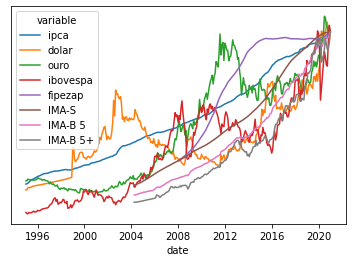

In [190]:
#criação de um dataframe equivalente ao original, porém com valores numéricos compatíveis entre si. Agora os últimos valores serão todos coincidentes
df_padronizado = pd.DataFrame(df_indices.loc[:, 'ipca'])
df_padronizado['dolar'] = df_indices['dolar'] * (df_indices['ipca'][-1] / df_indices['dolar'][-1])
df_padronizado['ouro'] = df_indices['ouro'] * (df_indices['ipca'][-1] / df_indices['ouro'][-1])
df_padronizado['ibovespa'] = df_indices['ibovespa'] * (df_indices['ipca'][-1] / df_indices['ibovespa'][-1])
df_padronizado['fipezap'] = df_indices['fipezap'] * (df_indices['ipca'][-1] / df_indices['fipezap'][-1])
df_padronizado['IMA-S'] = df_indices['IMA-S'] * (df_indices['ipca'][-1] / df_indices['IMA-S'][-1])
df_padronizado['IMA-B 5'] = df_indices['IMA-B 5'] * (df_indices['ipca'][-1] / df_indices['IMA-B 5'][-1])
df_padronizado['IMA-B 5+'] = df_indices['IMA-B 5+'] * (df_indices['ipca'][-1] / df_indices['IMA-B 5+'][-1])

df_com_ano = df_padronizado.reset_index()
df_melted = df_com_ano.melt(id_vars=['date'], value_vars=['ipca', 'dolar', 'ouro', 'ibovespa', 'fipezap', 'IMA-S', 'IMA-B 5', 'IMA-B 5+'])
g = sns.lineplot(x='date', y='value', hue='variable', data=df_melted)
g.set(yticks=[], ylabel='')
g


A correlação entre as séries de Dólar, Ouro, Ibovespa em relação ao IPCA podem ser visualizadas em um gráfico do tipo Pairplot, pois suas séries temporais são as mesmas

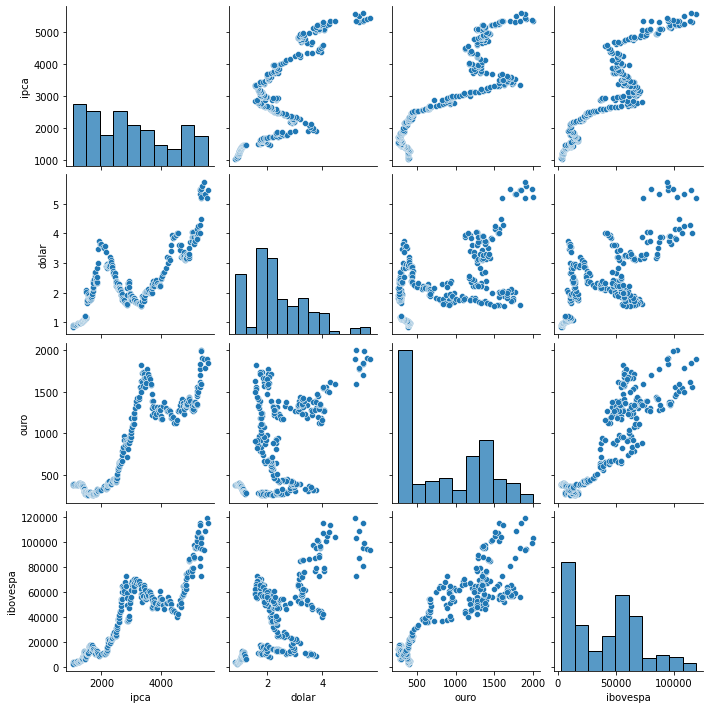

In [188]:
sns.pairplot(df_indices[['ipca', 'dolar', 'ouro', 'ibovespa']])


A correlação entre IPCA e os índices ANBIMA é melhor visualizada em um gráfico separado, pois sua série temporal se inicia apenas em 2004.


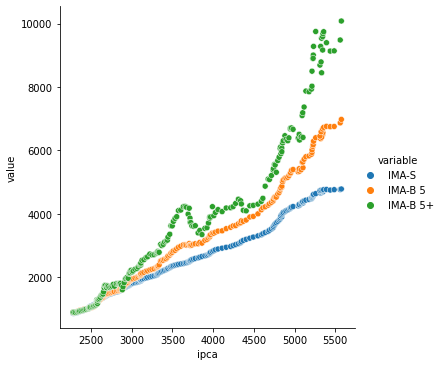

In [193]:
df_melted_anbima = df_indices.melt(id_vars=['ipca'], value_vars=['IMA-S', 'IMA-B 5', 'IMA-B 5+'])
sns.relplot(x='ipca', y='value', hue='variable', data=df_melted_anbima)


O mesmo se aplica à correlação entre o IPCA e o índice FIPEZap, que é plotado a partir de 2008, pois o índice FipeZap passou a ser calculado a partir dessa data.

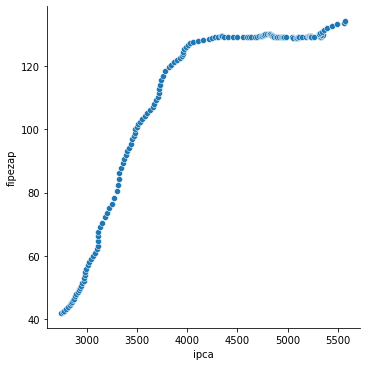

In [194]:
sns.relplot(data=df_indices, x='ipca', y='fipezap')

Depois de inspecionar visualmente as possíveis correlações entre os índices, convém analisar um mapa de calor dos dados de correlação de Pearson calculados para nossas variáveis

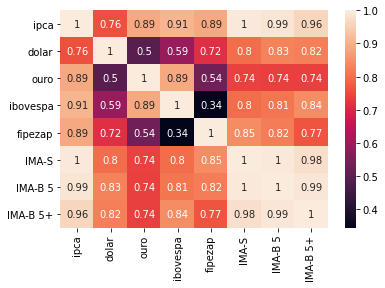

In [195]:
sns.heatmap(df_indices.corr(), annot=True)

A partir desse heatmap, nota-se que os dois fatores cujas séries temporais são mais curtas do que os demais (FipeZap e índices Anbima de títulos do Tesouro Nacional) apresentam correlações interessantes, além do Ouro e Ibovespa. Para melhor comparar esses fatores com os demais (excetuando-se o dólar, que já apresentou correlação notadamente inferior aos demais), será feito novo pairplot e heatmap, porém agora considerando-se somente a série temporal comum aos quatro principais fatores. Além do mais, essa nova série temporal, a partir de 2008, pode representar melhor nosso momento econômico atual.

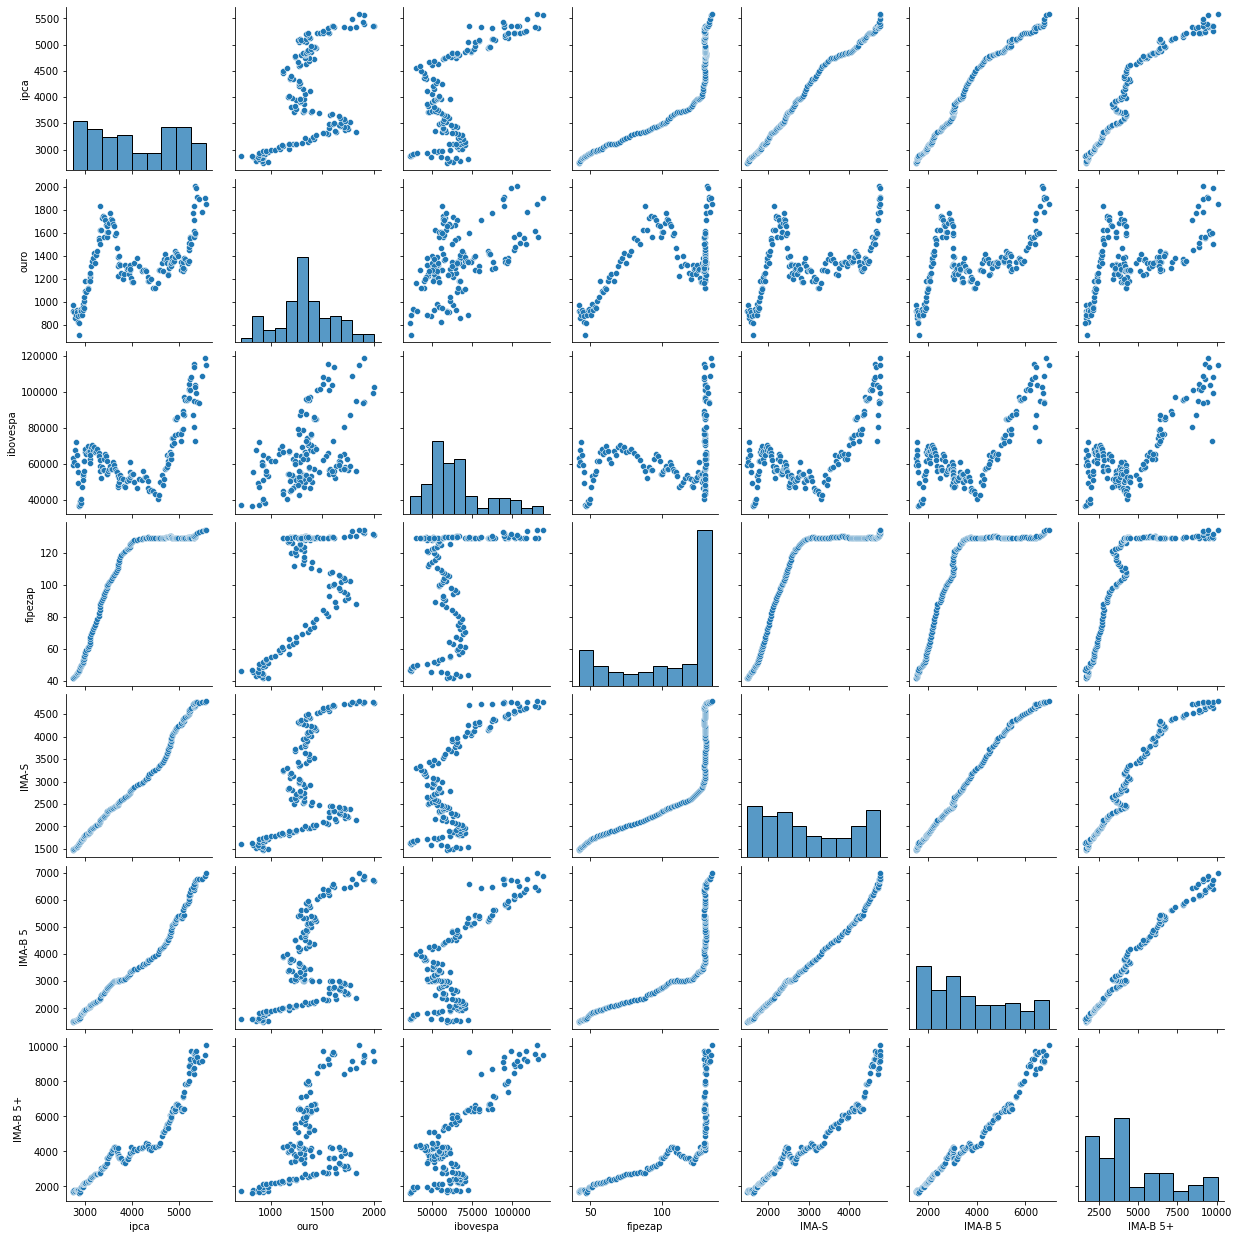

In [197]:
df_2008 = df_indices.loc[df_indices.index >= datetime.datetime(2008, 1, 1), ['ipca', 'ouro', 'ibovespa', 'fipezap', 'IMA-S', 'IMA-B 5', 'IMA-B 5+']]
sns.pairplot(df_2008)

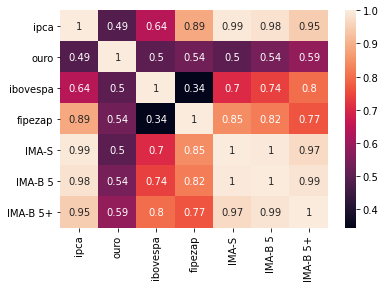

In [199]:
sns.heatmap(df_2008.corr(), annot=True)

### Conclusões e Achados

#####Conclusão n° 1: 
Surpreendentemente, o índice atrelado ao Tesouro SELIC é o título com melhor correlação com o IPCA, representando, portanto, a melhor proteção contra inflação. Uma possível explicação para essa correlação é a política econômica de subida da taxa básica de juros para controlar o avanço da inflação (correlação entre taxas IPCA e Selic: https://www.google.com/imgres?imgurl=http://4.bp.blogspot.com/-X54DiNkaR90/UHoUtqUJAwI/AAAAAAAAAhY/0v164mc8w0M/s1600/selic4.png&imgrefurl=http://www.atireiopaunografico.com.br/2012/10/selic-acompanha-ipca-ou-e-o-contrario.html&tbnid=32CpY1ceWcl51M&vet=1&docid=9VC6jZlZRoKRBM&w=1360&h=770&source=sh/x/im). Em seguida, os títulos públicos atrelados ao IPCA apresentam, também, altíssima correlação com a inflação, e também podem ser considerados alternativas interessantes, mesmo em prazos mais curtos em que não se carrega o título até o vencimento (situação na qual certamente o título pagaria o valor do IPCA acrescido de percentual adicional divulgado na venda do título). Uma observação interessante, coerente com informações que tenho lido na mídia especializada, é que os títulos públicos de vencimento mais curto (aqui representados pelo índice IMA-B 5) apresentam melhor proteção contra a inflação no curto prazo do que os de vencimento mais longo. A justificativa teórica para esse comportamento parte do pressuposto que a precificação dos títulos é inversamente proporcional à expectativa de juros futuros, que aumentam conforme a inflação sobe. Dessa forma, em cenários de alta de inflação, o mercado costuma projetar alta de juros futuros, promovendo, assim, a queda dos preços dos títulos de longo prazo. No entanto, o estudo de correlação apresentado acima mostra ainda grande correlação (0,95) mesmo para os títulos de longo prazo, mostrando que o investimento em títulos do Tesouro Nacional segue sendo a melhor alternativa contra inflação.

#####Conclusão n° 2:
O índice FipeZap, utilizado como aproximação para o investimento em imóveis, também apresenta grande correlação com a inflação. Embora haja a barreira do alto valor de entrada nesse tipo de investimento e a baixa liquidez, a proteção contra a inflação é, de fato, efetiva.
Para um próximo estudo, uma ampliação interessante seria avaliar a performance do IFIX, o índice de Fundos Imobiliários, que deve apresentar variação semelhante, porém com menor valor de entrada e maior liquidez.

#####Conclusão n° 3:
O dólar não é uma proteção realmente efetiva contra inflação. Embora tenha sido muito utilizada na época da hiperinflação brasileira, em que pessoas costumavam comparar valores de épocas diferentes em dólares e comprar dólares para se proteger da inflação, a cotação USD/BRL não possui grande correlação com a inflação. Embora seja uma correlação positiva, não é razoável dizer que a cotação da moeda americana possui correlação com a inflação brasileira. Isso não deixa de ser curioso, já que a subida do câmbio é historicamente considerada relevante para o aumento da inflação.

#####Conclusão n° 4:
Uma correlação inesperada que surgiu na maior janela de prazo foi a correlação entre Ouro e Ibovespa: o Ouro é considerado um porto seguro, tradicionalmente buscado em momentos de crise, e costuma ser justamente uma proteção contra variações na bolsa. Particularmente, eu esperava uma correlação negativa. No entanto, essa alta correlação no longo prazo mostra que tanto ouro como bolsa tendem a apresentar valorização consistente no longo prazo. Na janela de prazo mais curto essa correlação cai bastante, talvez perturbada pelo prazo inicial da janela ser coincidente com a crise internacional de 2008, que pode ter movimentado o preço do ouro e dos ativos em bolsa de maneira imprevista,principalmente nos primeiros valores da série. A própria visualização das séries temporais de Ouro e Ibovespa no primeiro gráfico (linhas verde e vermelha, respectivamente) mostra que o comportamento desses ativos é bastante parecido até 2008, e depois se torna mais díspare.